In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
from tqdm import tqdm
import networkx as nx
import random
from matplotlib.patches import Rectangle
import json
import seaborn as sns

#Mosiac Benchmark

In [3]:
pip install mosaic-benchmark

In [4]:
from mosaic_benchmark import ModularLinkStream

##Test

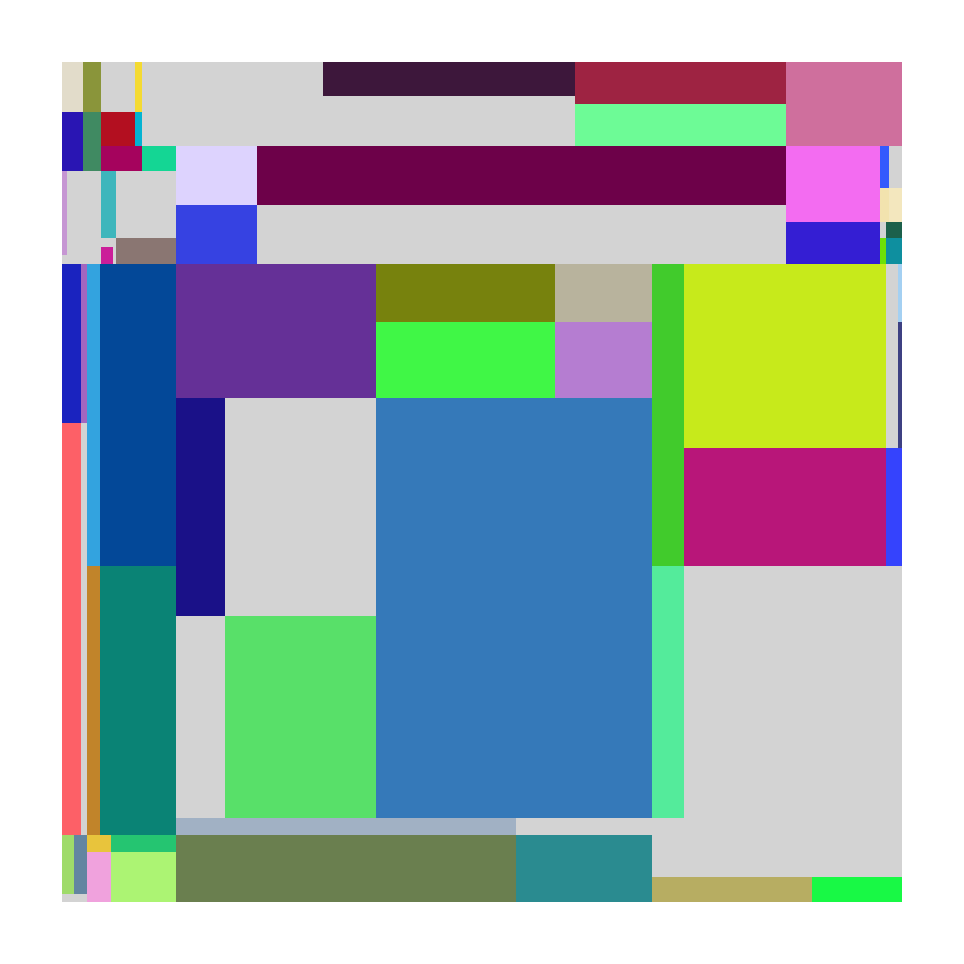

In [6]:
M=ModularLinkStream(number_of_nodes=100, t_start=0,t_end=100)
#M.random_scenario(30)
communities=np.load('scenario2-communities.npy',allow_pickle=True)
communities=communities.tolist()
for label in communities:
  comm=communities[label]
  M.add_community(comm.nodes,comm.t_start,comm.t_end )
M.plot()

#Tnetwork

In [ ]:
!pip install --upgrade git+https://github.com/Yquetzal/tnetwork.git

In [9]:
import tnetwork as tn
import tnetwork.DCD as DCD

#Dynamic community detection

In [14]:
evaluation_methods={'SM_P':DCD.SM_P,'SM_N':DCD.SM_N,'SM_L':DCD.SM_L}
detection_methods={ 'No-Smoothing':DCD.iterative_match, "Label smoothing":DCD.label_smoothing,"Implicit global":DCD.smoothed_louvain,"Smoothed graph":DCD.smoothed_graph}
answer={}
for ev in evaluation_methods:
  answer[ev]={}
  for det in detection_methods:
    answer[ev][det]={}
    for mu in np.arange(0,0.51,0.1):
      mu=round(mu,1)
      answer[ev][det][mu]=[]

In [15]:
for i in range(10):
  for mu in np.arange(0,0.51,0.1):
    alpha=1-mu
    beta=mu
    M.clear_edges()
    M.generate_edges(alpha, beta, 0.4,0.1)
    stream=pd.DataFrame(M.temporal_edges, columns=['node1', 'node2', 'time'])
    stream.time=stream.time.round(2)*100
    stream=stream.astype('int')
    dg_ls = tn.DynGraphSN(frequency=1)
    for (u, v, t)  in stream.to_numpy():
      dg_ls.add_interaction(str(u),str(v),int(t))
    bin=200
    converted_ls=dg_ls.aggregate_sliding_window(bin_size=bin, t_start=0,t_end=M.t_end*100)

    for method in detection_methods:
      com_res=detection_methods[method](converted_ls)
      for eva in evaluation_methods:
          answer[eva][method][round(mu,1)].append(evaluation_methods[eva](com_res))

  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting no_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting label_smoothing


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_louvain


  0% (0 of 50) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

starting smoothed_graph


 92% (46 of 50) |######################  | Elapsed Time: 0:00:00 ETA:   0:00:00

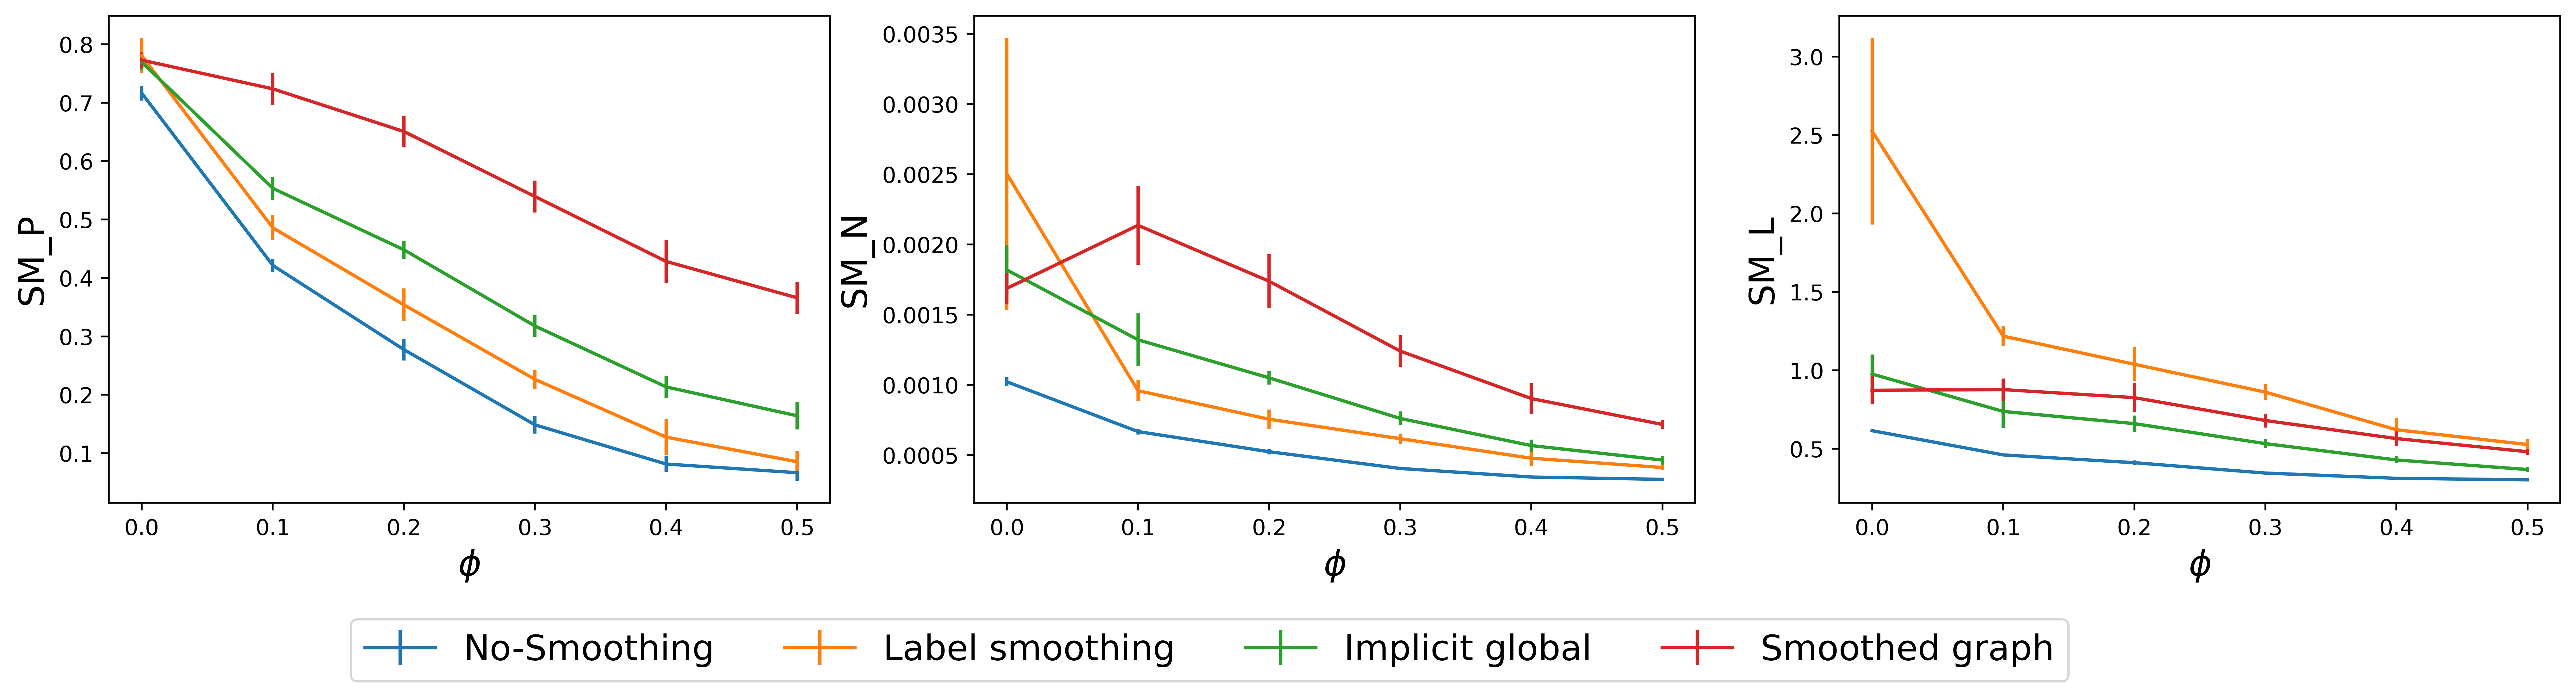

In [29]:
fig,ax=plt.subplots(nrows=1, ncols=3, figsize=(20,4), dpi=500)
for eva,axis in zip(evaluation_methods,ax):
  for method in detection_methods:
    res_dict_mean=[]
    res_dict_var=[]
    for mu in np.arange(0,0.51,0.1):
      val=answer[eva][method][round(mu,1)]
      res_dict_mean.append(np.mean(val))
      res_dict_var.append(np.std(val))

    axis.errorbar(np.arange(0,0.51,0.1),res_dict_mean, res_dict_var,label=method)

  axis.set_xlabel('$\phi$' ,fontsize=16)
  axis.set_ylabel(eva, fontsize=16)

fig.legend(detection_methods, loc='lower right', bbox_to_anchor=(0.75,-0.2), fontsize=16, ncol=len(detection_methods), bbox_transform=fig.transFigure)

#fig.tight_layout()
fig.savefig('Analysis2-smoothness.eps', format='eps', bbox_inches="tight")
fig.savefig('Analysis2-smoothness.png', bbox_inches="tight")